## Observations and Insights 

In [2]:
%matplotlib inline

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
study_data["Mouse ID"].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Provide visual of duplicate mouse data.
duplicate_mice = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_refresh = study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=False, ignore_index=False)

#Checking the number of mice in the clean DataFrame.
study_data_refresh["Mouse ID"].describe()

count     1888
unique     249
top       r944
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [8]:
# Getting drug names and counts to verify groupby function performs correctly to gather statistical data later.
regimen_counts = study_data_refresh["Drug Regimen"].value_counts()
regimen_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [9]:
#Drugs are: Capomulin, Ramicane, Ketapril, Naftisol, Zoniferol, Stelasyn, Placebo, Ceftamin, Infubinol, and Propriva.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens = study_data_refresh.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
regimens

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

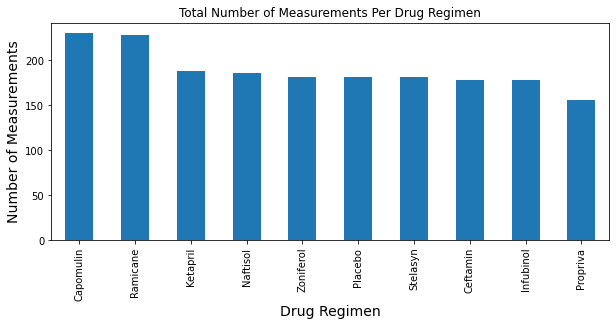

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_counts.plot(kind="bar", figsize=(10,4))

# Set a title for the chart
plt.title("Total Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Measurements",fontsize = 14)
plt.show()
plt.tight_layout()

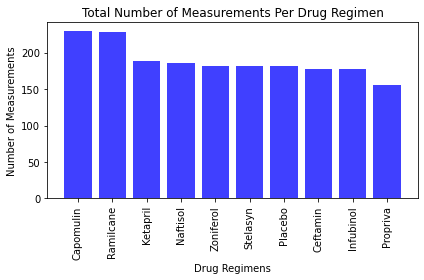

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = [ 1,2,3,4,5,6,7,8,9,10,]
counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
drugs = ["Capomulin", "Ramilcane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]
plt.bar(x_axis, counts, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation= '90')
plt.title("Total Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
plt.tight_layout()

In [12]:
#Generate counts for following two pie plots.
sex = study_data_refresh["Sex"].value_counts()
sex

Male      958
Female    930
Name: Sex, dtype: int64

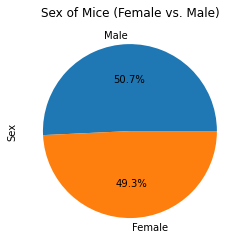

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex.plot(kind="pie", figsize=(10,4), autopct="%1.1f%%")

# Set a title for the chart
plt.title("Sex of Mice (Female vs. Male)")

plt.show()
plt.tight_layout()

(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

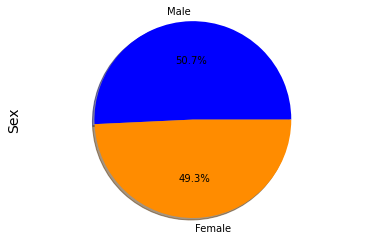

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958, 930]

# The colors of each section of the pie chart
colors = ["blue", "darkorange"]

#graph chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
top_drugs = study_data_refresh.set_index("Drug Regimen")
top_four = top_drugs.drop_duplicates(subset=["Mouse ID"], keep='last', inplace=False, ignore_index=False)
top_four_regimens = top_four.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], :]
top_four_regimens

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,u364,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...
Ceftamin,x226,Male,23,28,0,45.000000,0
Ceftamin,x581,Female,19,28,45,64.634949,3
Ceftamin,x822,Male,3,29,45,61.386660,3


In [18]:
#Separate the drug regimens to generate quartiles and IQR.
capomulin = top_four_regimens.loc["Capomulin", "Tumor Volume (mm3)"]
ramicane = top_four_regimens.loc["Ramicane", "Tumor Volume (mm3)"]
infubinol = top_four_regimens.loc["Infubinol", "Tumor Volume (mm3)"]
ceftamin = top_four_regimens.loc["Ceftamin", "Tumor Volume (mm3)"]

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for capomulin
quartiles = capomulin.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#for ramicane
rquartiles = ramicane.quantile([.25, .5, .75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq
rlower_bound = rlowerq - (1.5*riqr)
rupper_bound = rupperq + (1.5*riqr)

#for infubinol
iquartiles = infubinol.quantile([.25, .5, .75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq
ilower_bound = ilowerq - (1.5*iiqr)
iupper_bound = iupperq + (1.5*iiqr)

#for ceftamin
cquartiles = ceftamin.quantile([0.25,0.5,0.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq
clower_bound = clowerq - (1.5*ciqr)
cupper_bound = cupperq + (1.5*ciqr)

#print quartiles, IQR, and outliers for Capomulin
print(f"The lower quartile for Capomulin tumors is {lowerq}")
print(f"The upper quartile for Capomulin tumors is {upperq}")
print(f"The interquartile range of Capomulin tumors is {iqr}")
print(f"The median of Capomulin tumors is {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers for Capomulin.")
print(f"Values above {upper_bound} could be outliers for Capomulin.")

The lower quartile for Capomulin tumors is 32.37735684
The upper quartile for Capomulin tumors is 40.1592203
The interquartile range of Capomulin tumors is 7.781863460000004
The median of Capomulin tumors is 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.


In [23]:
#print quartiles, IQR, and outliers for Ramicane
print(f"The lower quartile for Ramicane tumors is {rlowerq}")
print(f"The upper quartile for Ramicane tumors is {rupperq}")
print(f"The interquartile range of Ramicane tumors is {riqr}")
print(f"The median of Ramicane tumors is {rquartiles[0.5]} ")
print(f"Values below {rlower_bound} could be outliers for Ramicane.")
print(f"Values above {rupper_bound} could be outliers for Ramicane.")

The lower quartile for Ramicane tumors is 31.56046955
The upper quartile for Ramicane tumors is 40.65900627
The interquartile range of Ramicane tumors is 9.098536719999998
The median of Ramicane tumors is 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.


In [24]:
#print quartiles, IQR, and outliers for Infubinol
print(f"The lower quartile for Infubinol tumors is {ilowerq}")
print(f"The upper quartile for Infubinol tumors is {iupperq}")
print(f"The interquartile range of Infubinol tumors is {iiqr}")
print(f"The median of Infubinol tumors is {iquartiles[0.5]} ")
print(f"Values below {ilower_bound} could be outliers for Infubinol.")
print(f"Values above {iupper_bound} could be outliers for Infubinol.")

The lower quartile for Infubinol tumors is 54.04860769
The upper quartile for Infubinol tumors is 65.52574285
The interquartile range of Infubinol tumors is 11.477135160000003
The median of Infubinol tumors is 60.16518046 
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


In [25]:
#print quartiles, IQR, and outliers for Ceftamin
print(f"The lower quartile for Ceftamin tumors is {clowerq}")
print(f"The upper quartile for Ceftamin tumors is {cupperq}")
print(f"The interquartile range of Ceftamin tumors is {ciqr}")
print(f"The median of Ceftamin tumors is {cquartiles[0.5]} ")
print(f"Values below {clower_bound} could be outliers for Ceftamin.")
print(f"Values above {cupper_bound} could be outliers for Ceftamin.")

The lower quartile for Ceftamin tumors is 48.72207785
The upper quartile for Ceftamin tumors is 64.29983003
The interquartile range of Ceftamin tumors is 15.577752179999997
The median of Ceftamin tumors is 59.85195552 
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


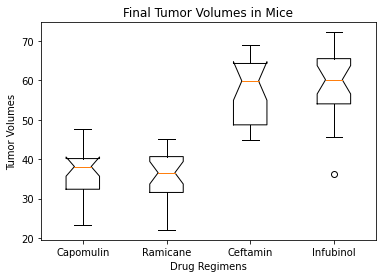

In [26]:
# Create lists for use in plots.
drugs = ["Capomulin", "Ramicane", "Ceftamin", "Infubinol"]
tv_data = [capomulin, ramicane, ceftamin, infubinol]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes in Mice')
ax1.set_ylabel('Tumor Volumes')
ax1.set_xlabel('Drug Regimens')
ax1.boxplot(tv_data, labels=drugs, widths = 0.4, notch=True)
plt.show()

## Line and Scatter Plots

In [51]:
#create dataframe with data only for capomulin and change index to mouse ID
capomulin_data = top_drugs.loc["Capomulin", :]
capomulin_data = capomulin_data.set_index("Mouse ID")

#reduce dataframe to drug, mouse id, tumor volume, and time point
capomulin_select = capomulin_data[["Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
capomulin_select

,Timepoint,Tumor Volume (mm3),Weight (g)
Mouse ID,,,
s185,0,45.000000,17
s185,5,43.878496,17
s185,10,37.614948,17
s185,15,38.177232,17
s185,20,36.866876,17
...,...,...,...
i557,45,47.685963,24
r157,0,45.000000,25
r157,5,45.597064,25


In [62]:
#select specific mouse
l897_data = capomulin_select.loc[ "l897" , ["Tumor Volume (mm3)", "Timepoint"]]
l897_data.head(120)

,Tumor Volume (mm3),Timepoint
Mouse ID,,
l897,45.000000,0
l897,45.462243,5
l897,46.154737,10
l897,44.061521,15
l897,44.813093,20
l897,45.354679,25
l897,39.352792,30
l897,37.682767,35
l897,38.343902,40


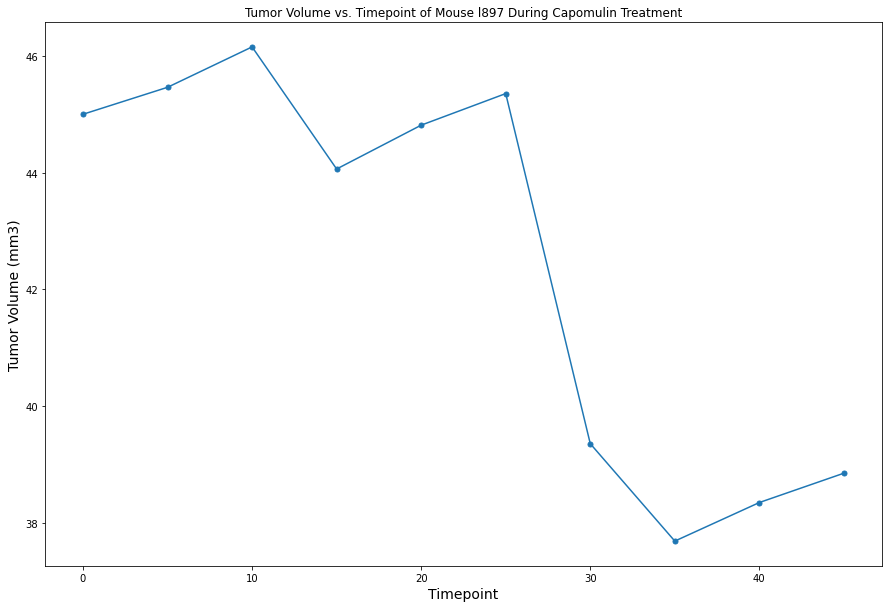

In [86]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tv = l897_data["Tumor Volume (mm3)"]
tp = l897_data["Timepoint"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title("Tumor Volume vs. Timepoint of Mouse l897 During Capomulin Treatment")
plt.ylabel('Tumor Volume (mm3)',fontsize = 14)
plt.xlabel('Timepoint',fontsize = 14)
plt.plot(tp, tv, markersize=5,marker="o")
plt.show()

Text(0.5, 0, 'Weight')

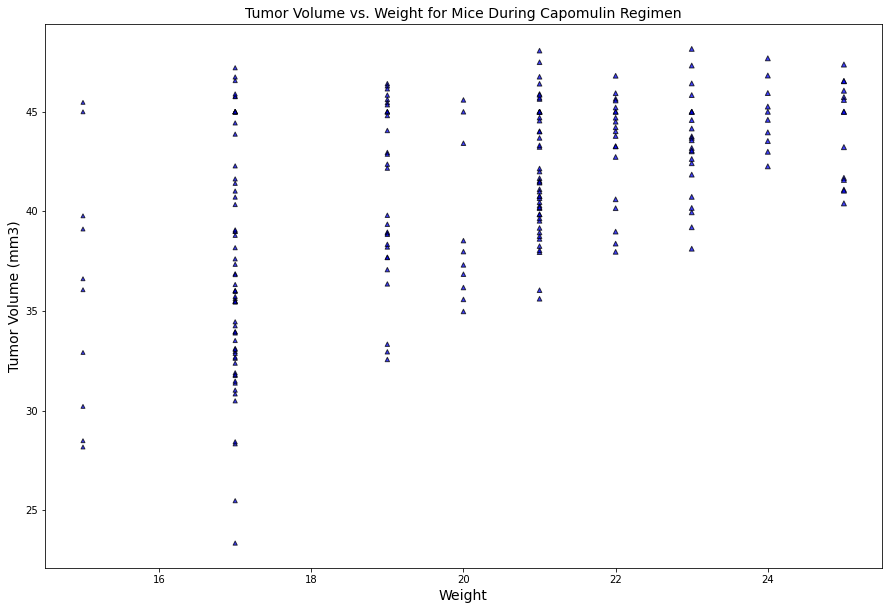

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumors_vol = capomulin_select["Tumor Volume (mm3)"]
weight = capomulin_select["Weight (g)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
x_limit = 100
x_axis = weight
plt.scatter(x_axis, tumors_vol, marker="^", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Tumor Volume vs. Weight for Mice During Capomulin Regimen", fontsize=14)
plt.ylabel('Tumor Volume (mm3)',fontsize = 14)
plt.xlabel('Weight',fontsize = 14)

## Correlation and Regression

In [89]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumors_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


The r-squared is: 0.27636002234559154


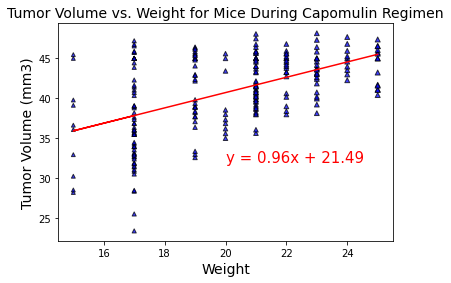

In [105]:
#Calculate linear regression and chart line over scatterplot
x_axis = weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumors_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, tumors_vol, marker="^", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")
plt.title("Tumor Volume vs. Weight for Mice During Capomulin Regimen", fontsize=14)
plt.ylabel('Tumor Volume (mm3)',fontsize = 14)
plt.xlabel('Weight',fontsize = 14)
print(f"The r-squared is: {rvalue**2}")
plt.show()